# Lab 4. Konwolucje

In [35]:
# ploting
%matplotlib inline
# imports
import torch
import numpy as np
import matplotlib.pyplot as plt

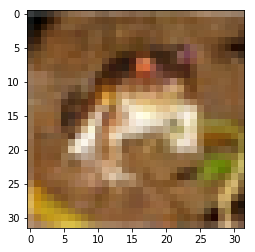

In [36]:
# data loading
cifar_sample = np.load('utils/cifar_sample.npy')
# get a first random image
np_image = cifar_sample[0]
# this should plot a blurry frog
plt.imshow(np_image.transpose(1,2,0)) 


### Konwolucja

In [37]:
def convolution(image: torch.tensor, 
                filters: torch.tensor, 
                bias: torch.tensor, 
                stride: int = 1, 
                padding: int = 1):
    """
    :param image: torch.Tensor 
        Input image of shape (C, H, W)
    :param filters: torch.Tensor 
        Filters to use in convolution of shape (K, C, F, F)
    :param bias: torch.Tensor 
        Bias vector of shape (K,)
    :param stride: int
        Stride to use in convolution
    :param padding: int
       Zero-padding to add on all sides of the image 
    """
    # get image dimensions
    img_channels, img_height, img_width = image.shape 
    n_filters, filter_channels, filter_size, filter_size = filters.shape 
    # calculate the dimensions of the output image
    out_height = 1+(img_height-filter_size+padding*2)//stride
    out_width =1+(img_width-filter_size+padding*2)//stride
    out_channels = n_filters
    
    out_image = torch.zeros((out_channels, out_height, out_width))
    
    padder = torch.nn.ConstantPad2d(padding, 0)    
    padded_img = padder(image)
    
    for i in range(out_height):
        for j in range(out_width):
            for c in range(out_channels):
                y_0 = stride*i
                y_1 = y_0+filter_size
                x_0 = stride*j
                x_1 = x_0+filter_size
                
                slice = padded_img[:,y_0:y_1, x_0: x_1]   
                conv = torch.sum(torch.mul(slice, filters[c]))+bias[c]
                
                out_image[c,i,j] = conv
    
    return out_image

In [38]:
### Convolution Test ### 

from itertools import product
from tqdm import tqdm_notebook as tqdm

# cast the frog to tensor
image = torch.tensor(np_image)
# preapre parameters for testing
paddings = [0, 1, 2, 3]
strides = [1, 2, 3, 4]
filters = [(torch.randn((2,3,3,3)), torch.zeros(2)),
           (torch.randn((2,3,5,5)), torch.zeros(2)),
           (torch.randn((5,3,1,1)), torch.zeros(5))]

# test all combinations
for (filt, bias), stride, padding in tqdm(product(filters, strides, paddings), total=4*4*3):
    # your convolution
    out = convolution(image, filt, bias, stride=stride, padding=padding)
    # PyTorch equivalent
    out_torch = torch.conv2d(input=image.unsqueeze(0), weight=filt, bias=bias, padding=padding, stride=stride)
    # asserts
    assert out_torch.squeeze().shape == out.shape
    assert torch.allclose(out, out_torch.squeeze(), atol=1e-5, rtol=1e-5)
print('conv OK')


conv OK


### Max Pooling

In [39]:
def max_pooling(image: torch.tensor, 
                kernel_size: int, 
                stride: int = 1, 
                padding: int = 1):
    """
    :param image: torch.Tensor 
        Input image of shape (C, H, W)
    :param kernel_size: int 
        Size of the square pooling kernel
    :param stride: int
        Stride to use in pooling
    :param padding: int
       Zero-padding to add on all sides of the image 
    """
    # get image dimensions
    img_channels, img_height, img_width = image.shape
    # calculate the dimensions of the output image
    out_height = 1+(img_height-kernel_size+padding*2)//stride
    out_width =1+(img_width-kernel_size+padding*2)//stride
    out_channels = img_channels
    
    out_image = torch.zeros((out_channels, out_height, out_width))
    
    padder = torch.nn.ConstantPad2d(padding, 0)    
    padded_img = padder(image)
    
    for i in range(out_height):
       for j in range(out_width):
           for c in range(out_channels):
               y_0 = stride*i
               y_1 = y_0+kernel_size
               x_0 = stride*j
               x_1 = x_0+kernel_size
               
               slice = padded_img[c,y_0:y_1, x_0: x_1]   
               pool = torch.max(slice)
               
               out_image[c,i,j] = pool

    return out_image

In [40]:
### Max Pooling Test ###

from itertools import product
from tqdm import tqdm_notebook as tqdm

# cast the frog to tensor
image = torch.tensor(np_image)
# preapre parameters for testing
kernel_sizes = [2, 3, 4]
paddings = [0, 1]
strides = [1, 2, 3, 4]

# test all combinations
for kernel_size, stride, padding in tqdm(product(kernel_sizes, strides, paddings), total=3*2*4):
    # your pooling
    out = max_pooling(image, kernel_size=kernel_size, stride=stride, padding=padding)
    # PyTorch equivalent
    out_torch = torch.nn.functional.max_pool2d(input=image.unsqueeze(0), kernel_size=kernel_size, padding=padding, stride=stride)
    # asserts
    assert out_torch.squeeze().shape == out.shape
    assert torch.allclose(out, out_torch.squeeze(), atol=1e-5, rtol=1e-5)
print('pool OK')


pool OK
